In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/bureau.csv


In [2]:
train = pd.read_csv('/kaggle/input/home-credit-default-risk/application_train.csv')
test = pd.read_csv('/kaggle/input/home-credit-default-risk/application_test.csv')
sample_submission = pd.read_csv('/kaggle/input/home-credit-default-risk/sample_submission.csv')

In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
train.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [6]:
# Empty fields fulfillment

train.fillna(method = "ffill", inplace = True)
test.fillna(method = "ffill", inplace = True)

# NaN's removement

train = train.dropna()
train = train.reset_index(drop=True)

In [7]:
train.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [8]:
test.isna().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 121, dtype: int64

In [9]:
# Categorical features encoding

categorical_fields = []

for col, col_type in dict(train.dtypes).items():
    if col_type == object:
        categorical_fields.append(col)
        
print(categorical_fields)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [10]:
for col in categorical_fields:
    train_encoder = preprocessing.LabelEncoder()
    train[col] = train_encoder.fit_transform(train[col])
    
    test_encoder = preprocessing.LabelEncoder()
    test[col] = test_encoder.fit_transform(test[col].astype(str))
    
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100008,0,0,1,0,1,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
4,100009,0,0,0,1,1,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0


In [11]:
# Normalization

from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

train[train.columns[:-1]] = scaler_x.fit_transform(train.iloc[:, :-1])
train[['TARGET']] = scaler_y.fit_transform(train[['TARGET']])

test[test.columns] = scaler_x.fit_transform(test)

train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.000000,0.0,1.0,0.5,1.0,1.0,0.000000,0.000358,0.022472,0.020025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.000006,0.0,0.0,0.0,0.0,1.0,0.000000,0.000935,0.066837,0.109477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.000008,0.0,0.0,0.5,0.0,1.0,0.000000,0.000819,0.116854,0.078975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.000011,0.0,0.0,0.5,0.0,1.0,0.000000,0.000627,0.111235,0.101018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003831,1.0
4,0.000014,0.0,0.0,0.0,1.0,1.0,0.052632,0.001243,0.378458,0.154774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.003831,2.0


In [12]:
# Features selection

# RFE

model = LogisticRegression(max_iter = 1000)

# help(RFE)

rfe = RFE(model, n_features_to_select = 10, step = 10, verbose = 1)

columns = list(train.columns)
columns.remove('TARGET')

fit = rfe.fit(train.loc[:, columns], train["TARGET"])

Fitting estimator with 121 features.
Fitting estimator with 111 features.
Fitting estimator with 101 features.
Fitting estimator with 91 features.
Fitting estimator with 81 features.
Fitting estimator with 71 features.
Fitting estimator with 61 features.
Fitting estimator with 51 features.
Fitting estimator with 41 features.
Fitting estimator with 31 features.
Fitting estimator with 21 features.
Fitting estimator with 11 features.


In [13]:
features_list = list(pd.Index(columns)[fit.support_])

print(features_list)

['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2']


In [14]:
for feature in features_list:
    train[feature + '_LOG'] = np.log1p(train[feature])
    test[feature + '_LOG'] =np.log1p(test[feature])

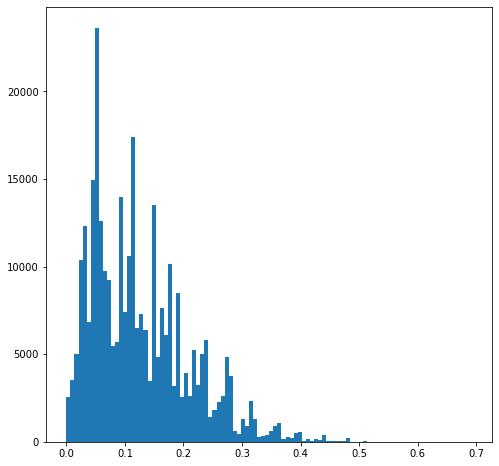

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize= (8,8))
plt.hist(train['AMT_CREDIT_LOG'], bins = 100)
plt.show()

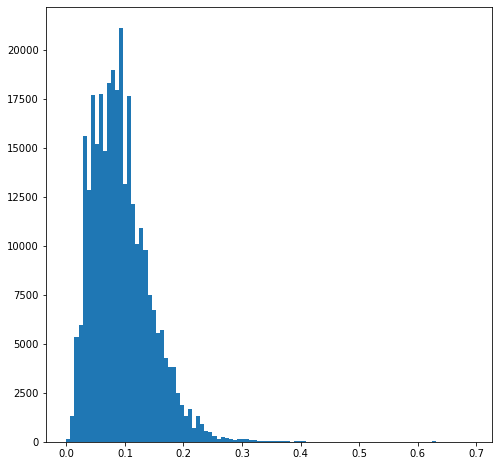

In [16]:
plt.figure(figsize= (8,8))
plt.hist(train['AMT_ANNUITY_LOG'], bins = 100)
plt.show()

In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

roc_auc_list = []

kf = KFold(n_splits=5)
kf.get_n_splits(train)

model = LogisticRegression()
features = features_list[:1]

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train.loc[train_index, features], train.loc[test_index, features ]
    y_train, y_test = train.loc[train_index, 'TARGET'], train.loc[test_index, 'TARGET']

    model.fit(X_train, y_train)
    predict = model.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, predict)
    roc_auc_list.append(roc_auc)
    print(i, roc_auc)
    
print("mean rmse for 5-fold: {}".format(str(np.mean(roc_auc_list))))
print("std roc_auc for 5-fold: {}".format(str(np.std(roc_auc_list))))

0 0.5181338949457484
1 0.515759404253552
2 0.5198854170272063
3 0.5163664864466323
4 0.5228040979030082
mean rmse for 5-fold: 0.5185898601152295
std roc_auc for 5-fold: 0.0025534699111212644


In [18]:
model.fit(train[features], train['TARGET'])

sample_submission['TARGET'] = model.predict_proba(test[features]) [:,1]

sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.072079
1,100005,0.085441
2,100013,0.068781
3,100028,0.043444
4,100038,0.070082


In [19]:
sample_submission.to_csv("submission.csv", index = None)

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

roc_auc_list = []

kf = KFold(n_splits=5)
kf.get_n_splits(train)

model = LogisticRegression()
features = features_list[:2]

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train.loc[train_index, features], train.loc[test_index, features ]
    y_train, y_test = train.loc[train_index, 'TARGET'], train.loc[test_index, 'TARGET']

    model.fit(X_train, y_train)
    predict = model.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, predict)
    roc_auc_list.append(roc_auc)
    print(i, roc_auc)
    
print("mean rmse for 5-fold: {}".format(str(np.mean(roc_auc_list))))
print("std roc_auc for 5-fold: {}".format(str(np.std(roc_auc_list))))

0 0.5319015272111135
1 0.5269332919222461
2 0.5319419626657018
3 0.5265227609952046
4 0.5337064161467608
mean rmse for 5-fold: 0.5302011917882054
std roc_auc for 5-fold: 0.0029126635313739707


In [21]:
model.fit(train[features], train['TARGET'])

sample_submission['TARGET'] = model.predict_proba(test[features]) [:,1]

sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.067567
1,100005,0.086707
2,100013,0.095025
3,100028,0.037912
4,100038,0.071231


In [22]:
sample_submission.to_csv("submission.csv", index = None)

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

roc_auc_list = []

kf = KFold(n_splits=5)
kf.get_n_splits(train)

model = LogisticRegression()
features = features_list[:4]

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train.loc[train_index, features], train.loc[test_index, features ]
    y_train, y_test = train.loc[train_index, 'TARGET'], train.loc[test_index, 'TARGET']

    model.fit(X_train, y_train)
    predict = model.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, predict)
    roc_auc_list.append(roc_auc)
    print(i, roc_auc)
    
print("mean rmse for 5-fold: {}".format(str(np.mean(roc_auc_list))))
print("std roc_auc for 5-fold: {}".format(str(np.std(roc_auc_list))))

0 0.5930957709469433
1 0.5935320835160764
2 0.5927853097519178
3 0.5918808705413482
4 0.5975277623369186
mean rmse for 5-fold: 0.5937643594186408
std roc_auc for 5-fold: 0.001958072152168877


In [24]:
model.fit(train[features], train['TARGET'])

sample_submission['TARGET'] = model.predict_proba(test[features]) [:,1]

sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.095666
1,100005,0.106047
2,100013,0.093999
3,100028,0.013931
4,100038,0.053587


In [25]:
sample_submission.to_csv("submission.csv", index = None)

In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

roc_auc_list = []

kf = KFold(n_splits=5)
kf.get_n_splits(train)

model = LogisticRegression()
features = features_list[:6]

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train.loc[train_index, features], train.loc[test_index, features ]
    y_train, y_test = train.loc[train_index, 'TARGET'], train.loc[test_index, 'TARGET']

    model.fit(X_train, y_train)
    predict = model.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, predict)
    roc_auc_list.append(roc_auc)
    print(i, roc_auc)
    
print("mean rmse for 5-fold: {}".format(str(np.mean(roc_auc_list))))
print("std roc_auc for 5-fold: {}".format(str(np.std(roc_auc_list))))

0 0.674577286177574
1 0.6784673438188018
2 0.674264026928299
3 0.6740419518407852
4 0.6782175317354681
mean rmse for 5-fold: 0.6759136281001856
std roc_auc for 5-fold: 0.0019919639410690805


In [27]:
model.fit(train[features], train['TARGET'])

sample_submission['TARGET'] = model.predict_proba(test[features]) [:,1]

sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.043504
1,100005,0.145277
2,100013,0.062175
3,100028,0.021331
4,100038,0.069075


In [28]:
sample_submission.to_csv("submission.csv", index = None)

In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

roc_auc_list = []

kf = KFold(n_splits=5)
kf.get_n_splits(train)

model = LogisticRegression(max_iter = 1000)
features = features_list[:8]

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train.loc[train_index, features], train.loc[test_index, features ]
    y_train, y_test = train.loc[train_index, 'TARGET'], train.loc[test_index, 'TARGET']

    model.fit(X_train, y_train)
    predict = model.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, predict)
    roc_auc_list.append(roc_auc)
    print(i, roc_auc)
    
print("mean rmse for 5-fold: {}".format(str(np.mean(roc_auc_list))))
print("std roc_auc for 5-fold: {}".format(str(np.std(roc_auc_list))))

0 0.7119645884262867
1 0.7127015465277854
2 0.7052773342691352
3 0.7156743983294076
4 0.7151361179303317
mean rmse for 5-fold: 0.7121507970965893
std roc_auc for 5-fold: 0.003712422281302257


In [30]:
model.fit(train[features], train['TARGET'])

sample_submission['TARGET'] = model.predict_proba(test[features]) [:,1]

sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.084305
1,100005,0.144961
2,100013,0.046351
3,100028,0.016803
4,100038,0.049564


In [31]:
sample_submission.to_csv("submission.csv", index = None)

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

roc_auc_list = []

kf = KFold(n_splits=5)
kf.get_n_splits(train)

model = LogisticRegression(max_iter = 1000)
features = features_list

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train.loc[train_index, features], train.loc[test_index, features ]
    y_train, y_test = train.loc[train_index, 'TARGET'], train.loc[test_index, 'TARGET']

    model.fit(X_train, y_train)
    predict = model.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, predict)
    roc_auc_list.append(roc_auc)
    print(i, roc_auc)
    
print("mean rmse for 5-fold: {}".format(str(np.mean(roc_auc_list))))
print("std roc_auc for 5-fold: {}".format(str(np.std(roc_auc_list))))

0 0.7123289034485907
1 0.7128662046442102
2 0.7053840578266476
3 0.7158444289858099
4 0.7151176344660635
mean rmse for 5-fold: 0.7123082458742643
std roc_auc for 5-fold: 0.0037054926825243204


In [33]:
model.fit(train[features], train['TARGET'])

sample_submission['TARGET'] = model.predict_proba(test[features]) [:,1]

sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.084135
1,100005,0.144745
2,100013,0.046388
3,100028,0.016751
4,100038,0.049482


In [34]:
sample_submission.to_csv("submission.csv", index = None)

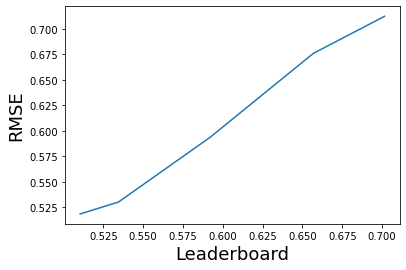

In [35]:
# Dependence of cross-validation and leaderboard metric

cross_validation_rates = [0.51859, 0.53020, 0.59376, 0.67591, 0.71215, 0.71230]
leaderboard_rates = [0.51045, 0.53447, 0.59210, 0.65682, 0.70142, 0.70151]

metrics = np.arange(0.0, 1.0, 0.01)

plt.plot(leaderboard_rates, cross_validation_rates)
plt.ylabel('RMSE', fontsize=18)
plt.xlabel('Leaderboard', fontsize=18)
plt.show()

In [64]:
# WoE Calculation

if 'SK_ID_CURR' in columns:
    columns.remove('SK_ID_CURR')

    
iv_dict = {}

for column in columns:
    calc_list = []
    
    for i in range(train[column].nunique()):
        value = list(train[column].unique())[i]
        
        calc_list.append({
            'Value': value,
            'Good': train[(train[column] == value) & (train['TARGET'] == 0)].count()[column],
            'Bad': train[(train[column] == value) & (train['TARGET'] == 1)].count()[column],
        })
        
    dset = pd.DataFrame(calc_list)
        
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
        
    dset = dset.sort_values(by='WoE')
    
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
        
    iv_dict[column] = dset['IV'].sum()
    print(column, iv_dict[column])

NAME_CONTRACT_TYPE 0.015036443622573297
CODE_GENDER 0.03857787819278786
FLAG_OWN_CAR 0.006592630598321655
FLAG_OWN_REALTY 0.000506923547052542
CNT_CHILDREN 0.006071014670808414
AMT_INCOME_TOTAL 0.02439086188641848
AMT_CREDIT 0.27145384989237953
AMT_ANNUITY 0.49670085831249255
AMT_GOODS_PRICE 0.12877107318406633
NAME_TYPE_SUITE 0.0014703982849547236
NAME_INCOME_TYPE 0.058306863785698035
NAME_EDUCATION_TYPE 0.05082505175656217
NAME_FAMILY_STATUS 0.02168145873345126
NAME_HOUSING_TYPE 0.015733375242040694
REGION_POPULATION_RELATIVE 0.07459276123546954
DAYS_BIRTH 0.3927236375126911
DAYS_EMPLOYED 0.26980192850664586
DAYS_REGISTRATION 0.3339869557925614
DAYS_ID_PUBLISH 0.27183739262309126
OWN_CAR_AGE 0.007945696986018519
FLAG_MOBIL 1.25139737468798e-11
FLAG_EMP_PHONE 0.03290230954439059
FLAG_WORK_PHONE 0.010332795087872682
FLAG_CONT_MOBILE 1.866466312159675e-06
FLAG_PHONE 0.007953327812825746
FLAG_EMAIL 4.198757927334224e-05
OCCUPATION_TYPE 0.04693093927756367
CNT_FAM_MEMBERS 0.00577597081159

KeyboardInterrupt: 